In [13]:
import seaborn as sns
import pandas as pd 
import numpy as np

In [6]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [7]:
tips.dessert.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
tips.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

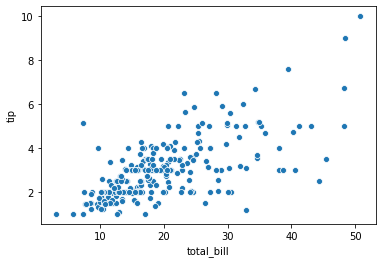

In [9]:
g1 = sns.scatterplot(x='total_bill', y='tip', data=tips)

In [10]:
tips.shape[0]

244

In [11]:
#registros não-nulos
tips.count()

total_bill    244
tip           244
dessert       244
day           244
time          244
size          244
dtype: int64

In [23]:
tips['percent'] = tips['tip'] / tips['total_bill']

In [24]:
tips.head()

,total_bill,tip,dessert,day,time,size,percent
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [25]:
tips.percent = tips.percent.round(2)
tips.head()

,total_bill,tip,dessert,day,time,size,percent
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


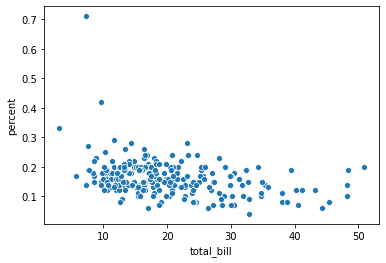

In [26]:
g2 = sns.scatterplot(x='total_bill', y='percent', data=tips)

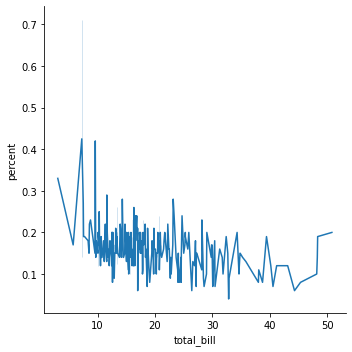

In [28]:
g3 = sns.relplot(x='total_bill', y='percent', data=tips, kind='line')

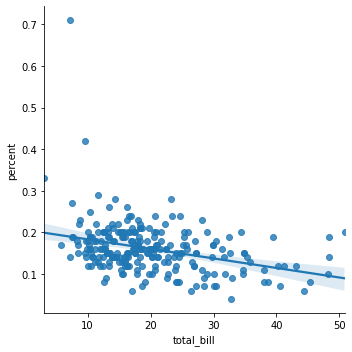

In [30]:
g4 = sns.lmplot(x='total_bill', y='percent', data=tips)

In [34]:
ordered_dessert = tips[tips.dessert == 'Yes']
ordered_dessert.describe()

,total_bill,tip,size,percent
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [36]:
not_ordered_dessert = tips[tips.dessert == 'No']
not_ordered_dessert.describe()

,total_bill,tip,size,percent
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


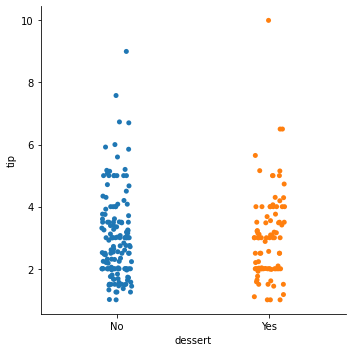

In [37]:
sns.catplot(x='dessert', y='tip', data=tips)

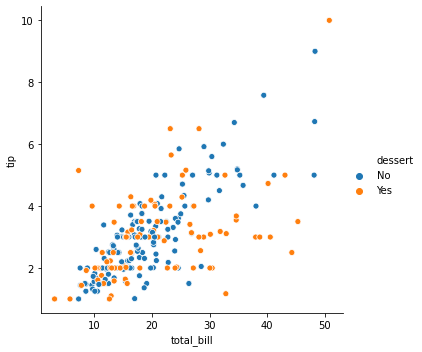

In [38]:
sns.relplot(x='total_bill', y='tip', hue='dessert', data=tips)

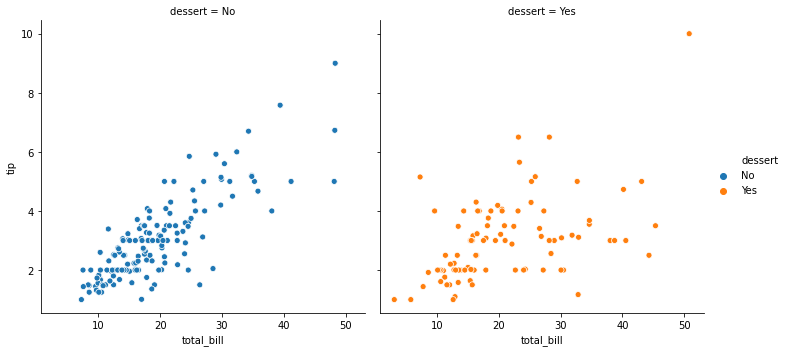

In [39]:
sns.relplot(x='total_bill', y='tip', hue='dessert', col= 'dessert',data=tips)

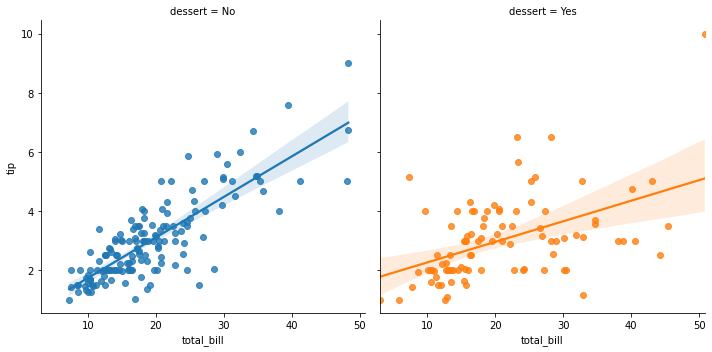

In [40]:
sns.lmplot(x='total_bill', y='tip', hue='dessert', col= 'dessert',data=tips)

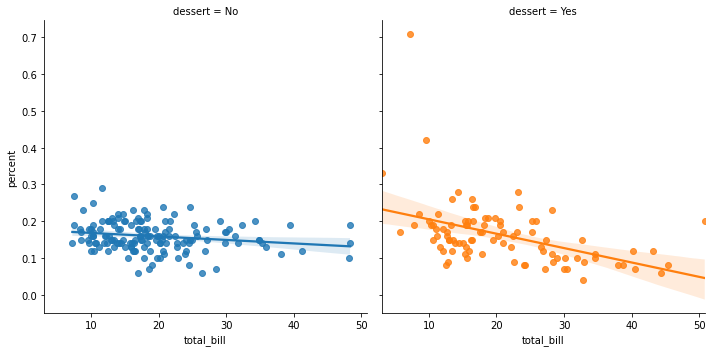

In [41]:
sns.lmplot(x='total_bill', y='percent', hue='dessert', col= 'dessert',data=tips)

In [42]:
#teste de hipóteses
from scipy.stats import ranksums

#hipótese nula: a distribuição da taxa de gorjeta é a mesma nos dois grupos
#hipótese alternativa: a distribuição da taxa de gorjeta NÃO é a mesma nos dois grupos

In [46]:
ordered_dessert = tips.query("dessert == 'Yes'").percent
ordered_dessert

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: percent, Length: 93, dtype: float64

In [47]:
not_ordered_dessert = tips.query("dessert == 'No'").percent
not_ordered_dessert

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: percent, Length: 151, dtype: float64

In [49]:
r = ranksums(ordered_dessert, not_ordered_dessert)
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [51]:
#para aceitar a hipótese alternativa, o pvalue deve ser igual ou menor que 0.05, que não é o caso, então ela está descartada.

tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

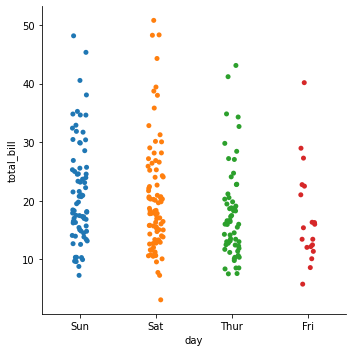

In [52]:
sns.catplot(x='day', y='total_bill', data=tips)

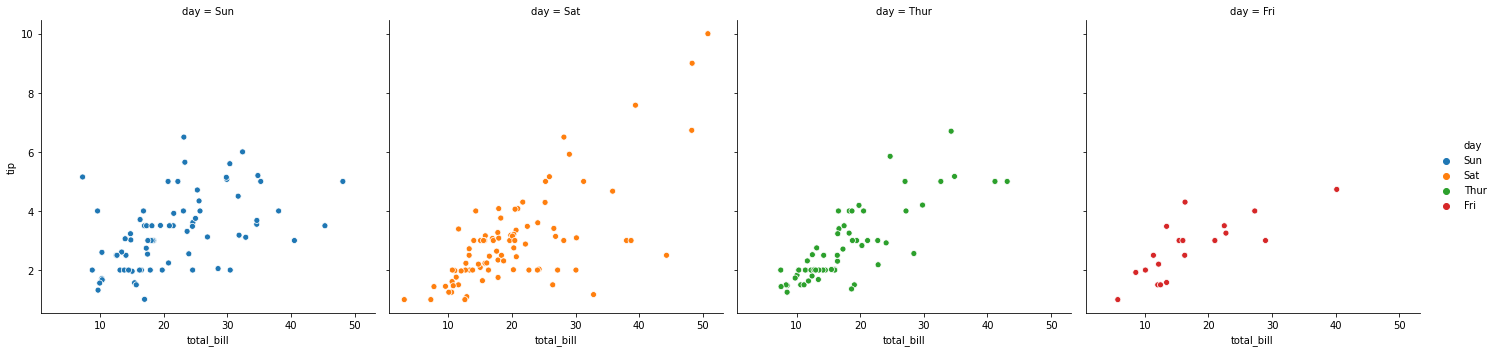

In [53]:
sns.relplot(x='total_bill', y='tip', hue='day', col='day', data=tips)

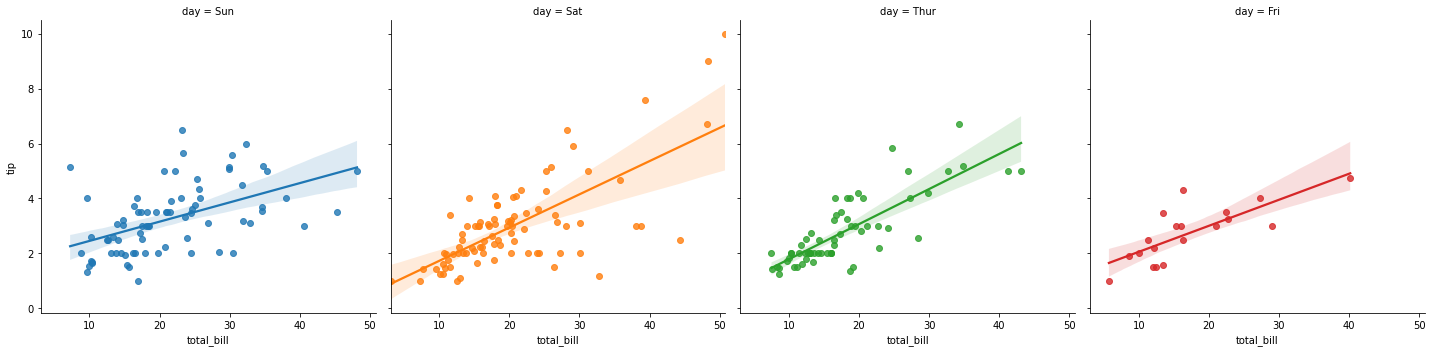

In [54]:
sns.lmplot(x='total_bill', y='tip', hue='day', col='day', data=tips)

In [57]:
media_tips = tips.tip.mean()
media_tips

2.9982786885245902

In [67]:
tips.groupby(['day']).mean()

,total_bill,tip,size,percent
day,,,,
Fri,17.151579,2.734737,2.105263,0.169474
Sat,20.441379,2.993103,2.517241,0.153678
Sun,21.410000,3.255132,2.842105,0.166974
Thur,17.682742,2.771452,2.451613,0.161129


In [68]:
tips.groupby(['day']).mean()[['total_bill', 'tip', 'percent']]

,total_bill,tip,percent
day,,,
Fri,17.151579,2.734737,0.169474
Sat,20.441379,2.993103,0.153678
Sun,21.410000,3.255132,0.166974
Thur,17.682742,2.771452,0.161129


In [69]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [71]:
sunday_bill = tips.query("day == 'Sun'").total_bill
sunday_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: total_bill, Length: 76, dtype: float64

In [72]:
sat_bill = tips.query("day == 'Sat'").total_bill
sat_bill

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: total_bill, Length: 87, dtype: float64

In [73]:
ranksums(sunday_bill, sat_bill)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [74]:
tips.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

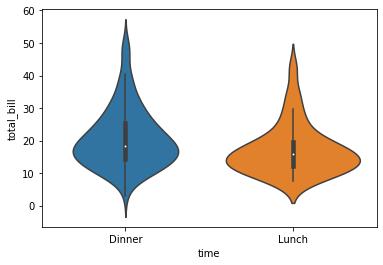

In [75]:
sns.violinplot(x='time', y='total_bill', data=tips)

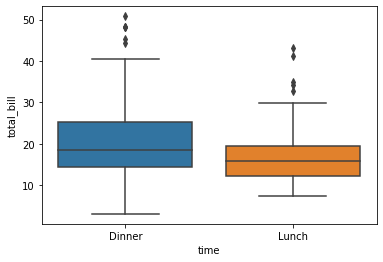

In [76]:
sns.boxplot(x='time', y='total_bill', data=tips)

In [78]:
lunch = tips.query("time == 'Lunch'").total_bill
lunch

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: total_bill, Length: 68, dtype: float64

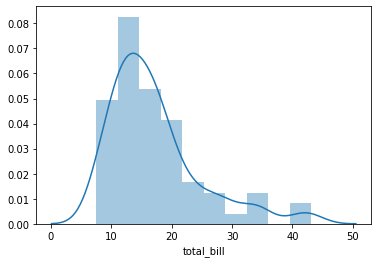

In [79]:
sns.distplot(lunch)

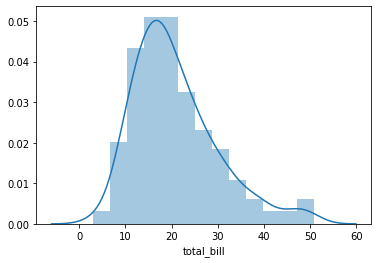

In [80]:
dinner = tips.query("time == 'Dinner'").total_bill
sns.distplot(dinner)

In [82]:
tips.groupby(['time']).mean()[['total_bill', 'tip', 'percent']]

,total_bill,tip,percent
time,,,
Dinner,20.797159,3.102670,0.159773
Lunch,17.168676,2.728088,0.163971


In [83]:
ranksums(dinner, lunch)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [84]:
#valor do p-value afirma a hipótese alternativa: a distribuição da taxa da gorjeta não é igual no jantar e no almoço

In [87]:
pc_lunch = tips.query("time == 'Lunch'").percent
pc_dinner = tips.query("time == 'Dinner'").percent

ranksums(pc_lunch, pc_dinner)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)